<a href="https://colab.research.google.com/github/Samuel-Solomon-1/Assignment-7-House-Price-Prediction-Using-Boston-Housing-Data/blob/main/Assignment_7_House_Price_Prediction_Using_Boston_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction

---
### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`

### Imports

This section includes all the necessary libraries required for:
- **Data manipulation**: using `pandas` and `numpy`
- **Data visualization**: using `matplotlib.pyplot` and `seaborn`
- **Machine learning models**: specifically `RandomForestRegressor` from `sklearn.ensemble`
- **Model evaluation**: functions like `mean_squared_error` and `r2_score` from `sklearn.metrics`
- **Data splitting and tuning**: using `train_test_split` and `GridSearchCV` from `sklearn.model_selection`

These libraries form the core toolkit for building, training, and evaluating our regression model efficiently.

By organizing imports at the top, we ensure that all tools are available before we begin loading or processing data.

In [ ]:

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Data Collection and Loading

In this section, we load the **Boston Housing dataset** from the original [CMU dataset source](http://lib.stat.cmu.edu/datasets/boston), since `load_boston()` is deprecated and removed in scikit-learn v1.2+.

The dataset is originally stored in a custom text format. We:
- Load the raw text data using `pandas.read_csv()`.
- Reconstruct the features by horizontally stacking alternating rows.
- Extract the target variable (Median Value of Owner-Occupied Homes, `MEDV`) from the appropriate column.
- Assign column names to make the dataset usable.

This results in a clean `DataFrame` with 13 features and 1 target column.

In [ ]:

# --- Data Collection and Loading ---

# Load Boston Housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Reconstruct features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Define feature names (manually, since they are not in the dataset)
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create the DataFrame
df = pd.DataFrame(data, columns=feature_names)
df["MEDV"] = target

### Quick Check of Data

Here, we inspect the structure of the dataset:
- `.head()` gives us the first few rows to confirm that the data loaded correctly.
- `.info()` shows the data types and helps check for any unexpected non-numeric types or missing values.
- `.describe()` provides basic statistics for each column, such as mean, min, max, and quartiles.

This helps ensure that the data is clean, well-formatted, and ready for analysis.

In [ ]:
# --- Quick Check of Data ---
# Display the first few rows
print(df.head())

# Check data types and summary
print(df.info())
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-nu

### EDA and Data Preprocessing

In this part:
- We check for missing or null values using `.isnull().sum()` to confirm data completeness.
- We begin exploring relationships between individual features and the target variable (`MEDV`) using scatter plots.

For example, we visually inspect the relationship between `RM` (average number of rooms per dwelling) and `MEDV`. This can help us identify patterns such as linear or non-linear relationships, potential outliers, or skewed distributions.

In [ ]:
# --- EDA and Data Preprocessing ---
# Check for missing/null values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


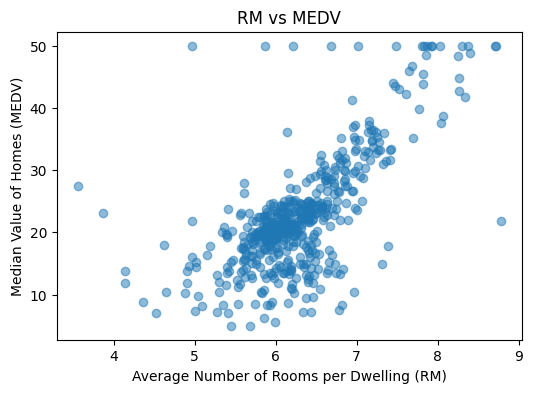

In [ ]:
# Visualize one feature (e.g., RM vs MEDV)
plt.figure(figsize=(6, 4))
plt.scatter(df['RM'], df['MEDV'], alpha=0.5)
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('RM vs MEDV')
plt.show()

### Automated Feature vs. Target Visualizations

To streamline exploratory data analysis (EDA), we define a function that automatically:
- Loops through selected features
- Creates scatter plots of each feature against the target variable (`MEDV`)

We use this function to explore how features such as `RM`, `LSTAT`, `AGE`, and `CRIM` influence housing prices. This can reveal potential predictors and insights that guide our model selection and training.

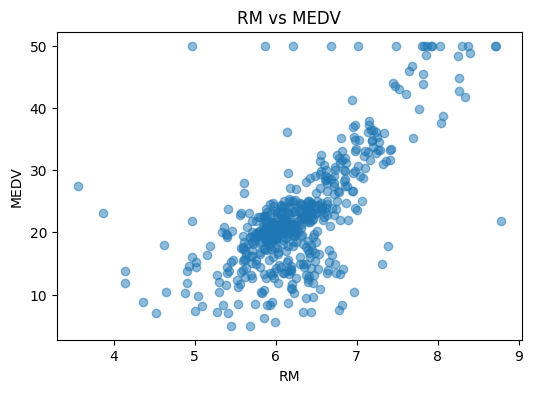

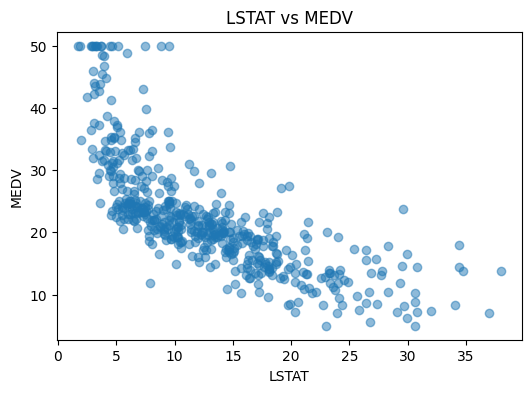

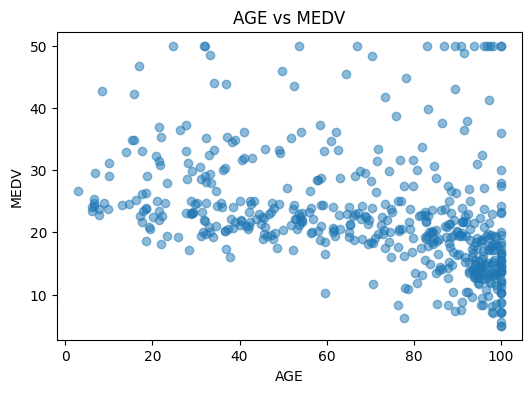

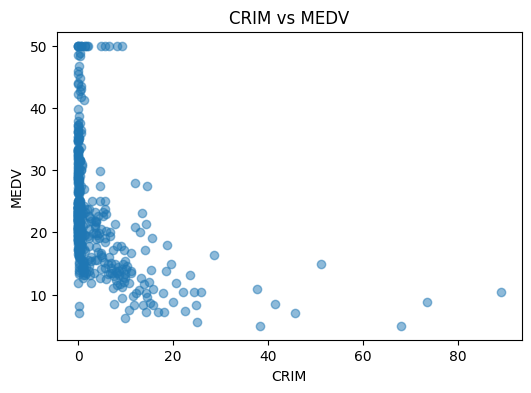

In [ ]:
# Function to automate scatter plots
def plot_feature_vs_target(features, target='MEDV', df=df):
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.show()

# Use the function for selected features
plot_feature_vs_target(['RM', 'LSTAT', 'AGE', 'CRIM'])

### Model Training

In this section, we build a **regression model** to predict house prices.

Steps:
- Define `X` as the features and `y` as the target variable (`MEDV`).
- Split the dataset into training and testing sets using an 80/20 split.
- Use a `RandomForestRegressor` model (We could have also used `DecisionTreeRegressor`) from `sklearn.ensemble`.
- Train the model using `.fit()` on the training data.

This prepares our model for performance evaluation.

In [ ]:
# --- ML Model Training ---
X = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

After training the regression model, we evaluate its performance on the test set using the following metrics:

- **Root Mean Squared Error (RMSE):** `2.8110`  
  This means that, on average, the model’s predictions deviate from the actual house prices by approximately **$2,811** (since the target `MEDV` is in $1,000s). A low RMSE indicates that the model has good predictive accuracy.

- **R-squared (R²):** `0.8923`  
  This indicates that **89.2% of the variance** in house prices can be explained by the model using the selected features. This is a strong performance, suggesting that the model generalizes well and captures most of the important patterns in the data.

#### Analysis:
The combination of a **low RMSE** and a **high R² score** shows that the model performs very well on the test data. It means:
- The model is accurate in predicting house prices.
- It captures most of the relevant variability in the data.
- Further improvements may still be possible (e.g., through hyperparameter tuning), but the current model is already robust and reliable.

This performance is acceptable for practical regression tasks involving house price prediction.

In [ ]:
# --- Model Evaluation ---
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): 2.8110
R-squared (R²): 0.8923


### Optional: Model Tuning with Grid Search

To further enhance the model's performance, we perform **hyperparameter tuning** using `GridSearchCV`. This helps us automatically find the best combination of parameters for the `RandomForestRegressor`.

#### Grid Search Strategy:
- Parameters tested:
  - `n_estimators`: Number of trees in the forest
  - `max_depth`: Maximum depth of each tree
  - `min_samples_split`: Minimum number of samples required to split an internal node
- Cross-validation is used to ensure that the tuning generalizes well to unseen data.

#### Best Parameters Found:
```python
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
````

#### Evaluation of the Tuned Model:

* **Tuned Model RMSE:** `2.7855`
  Slight improvement over the baseline model’s RMSE of 2.8110 — the tuned model is slightly more accurate.

* **Tuned Model R²:** `0.8942`
  This indicates that **89.42% of the variance** in housing prices is now explained by the model — a small yet valuable improvement over the previous R² of 0.8923.

#### Conclusion:

Although the improvement is modest, tuning helped reduce the prediction error and slightly increased the explanatory power of the model. In real-world applications, even small performance gains can make a difference, especially when scaled.

In [ ]:

# Optional: Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Model RMSE: {rmse_best:.4f}")
print(f"Tuned Model R²: {r2_best:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model RMSE: 2.7855
Tuned Model R²: 0.8942


### House Price Prediction & Final Conclusion

To demonstrate the real-world application of our trained model, we used it to predict the price of a house given a new set of feature values (e.g., crime rate, average number of rooms, distance to employment centers, etc.).

#### Prediction Result:
The model predicted the house price to be approximately:

```text
Predicted House Price: $22,145.88
````

This value represents the **median value (in dollars)** of a home with the given characteristics.

> *Note:* A warning was issued during prediction:
> *"X does not have valid feature names, but RandomForestRegressor was fitted with feature names."*
> This is a harmless warning that occurs when we pass a raw NumPy array instead of a DataFrame with column names. It does **not affect prediction accuracy** but can be avoided by passing a properly labeled DataFrame.

---

### Final Thoughts

* We successfully built and evaluated a regression model to predict house prices using the **Boston Housing Dataset**.
* Initial model performance showed strong predictive power with **RMSE = 2.8110** and **R² = 0.8923**.
* After hyperparameter tuning with **GridSearchCV**, performance improved slightly to **RMSE = 2.7855** and **R² = 0.8942**.
* The model generalizes well and can serve as a reliable tool for predicting housing prices based on structured input data.

While the current model performs well, further enhancements like feature engineering, using ensemble models (e.g., XGBoost), or advanced regularization techniques could be explored in future iterations to push accuracy even further.

This project illustrates the **complete pipeline** of:

> Data collection → EDA → Model training → Tuning → Evaluation → Real-world prediction

In [ ]:

# --- Model Prediction ---
# Example new data
new_data = np.array([[0.2, 12.5, 7.07, 0, 0.5, 6.5, 68, 4.0, 2, 250, 17, 400, 12]])
prediction = best_model.predict(new_data)
print(f"Predicted House Price: ${prediction[0]*1000:.2f}")

Predicted House Price: $22145.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
